<a href="https://colab.research.google.com/github/alexiscorney/AiWorkbooks/blob/main/CatsOrDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs Convolutional Neural Network
A Convolutional Neural Network (CNN) is a type of artificial neural network specifically designed to process and analyse visual data, like images.

We are going to create a CNN and train it to classify images of cats and dogs.

This workbook will teach you a little about how a CNN works, what it's made of and how to train it.

<img src="https://miro.medium.com/max/1838/1*oB3S5yHHhvougJkPXuc8og.gif">

##We are going to:


1.   Download a dataset - images of cats and dogs - and prepare the data to be fed to our network
2.   Create a CNN that will classify images as either a cat or a dog
3. Train our CNN using our dataset
4. Evaluate the accuracy and precision of our model
5. See if it can classify our own pets



##Creating our dataset

The success of a great Ai depends on data. Luckily, we've found a dataset with over 25,000 images of cats and dogs which will be perfect for our classification problem.

Run the command below to download 2,000 of these images and place them into a folder called "raw_data/"

To see our folder, click on the folder icon on the left hand side of this notebook, then click the "up folder" icon to go up one directory.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/raw_data')
zip_ref.close()


--2024-06-14 20:11:52--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   197MB/s    in 0.3s    

2024-06-14 20:11:52 (197 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
base_directory = '/raw_data/cats_and_dogs_filtered'
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')

# Directory with our training cat pictures
train_cats_directory = os.path.join(train_directory, 'cats')

# Directory with our training dog pictures
train_dogs_directory = os.path.join(train_directory, 'dogs')

# Directory with our validation cat pictures
validation_cats_directory = os.path.join(validation_directory, 'cats')

# Directory with our validation dog pictures
validation_dogs_directory = os.path.join(validation_directory, 'dogs')

# Store the filenames in a list
train_cat_filenames = os.listdir(train_cats_directory)
train_dog_filenames = os.listdir(train_dogs_directory)

Our images are split into two sets: **train** and **validation**

These are further split into categories: cats or dogs

The train directory will be used to train the model (we give our model the questions and the answers so it can update its weights if it makes a mistake). This is like revising for an exam.

We don't give the model all of our test data. Some is kept back as validation data and is used to calculate the accuracy of our trained model - how well it performs on unseen data.

## Display some pictures

Run the code below to print out an image of a cat and a dog. Run it again to show a different pair.

matplotlib is a python libary used to display images and graphs

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Set up matplotlib fig, and size it to fit 2x1 pics
fig = plt.gcf()
fig.set_size_inches(6, 6)

random_cat_number = random.randint(0,len(train_cat_filenames))
random_dog_number = random.randint(0,len(train_dog_filenames))
cat_pic = os.path.join(train_cats_directory, train_cat_filenames[random_cat_number])
dog_pic = os.path.join(train_dogs_directory, train_dog_filenames[random_dog_number])

subplot = plt.subplot(1, 2, 1)
subplot.axis('Off') # Don't show axes (or gridlines)
plt.imshow(mpimg.imread(cat_pic))
subplot = plt.subplot(1, 2, 2)
subplot.axis('Off') # Don't show axes (or gridlines)
plt.imshow(mpimg.imread(dog_pic))

plt.show()

# Building the Model

Now we can create a Convolutional Neural Network to be trained using our cat and dog images

We are going to use tensorflow and keras - these are python machine learning libararies.

In [4]:
# List of keras tools
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras import applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [5]:
def create_model():

  # A sequential model is a basic model structure where the layers are stacked layer by layer.
  model = Sequential()

  # A convolutional layer slides a filter over the image which is fed to the activation layer so the model can learn
  # features and activate when they see one of these visual features. Only activated features are carried over to the
  # next layer.
  model.add(Convolution2D(32, (3, 3), input_shape=(150, 150, 3)))

  # ReLU only outputs a value if it is positive, otherwise it outputs 0.
  model.add(Activation('relu'))

  # A pooling layer reduces the dimensions of the image but not the depth to make computation faster.
  # Less image data means less chance of over fitting - this is where the model learns the training data too specifically and can't generalise to other images.
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Add another 2 stacks of these layers
  model.add(Convolution2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Convolution2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Squashes the output of the previous layer to an array with 1 dimension
  model.add(Flatten())

  # A dense layer takes n number of inputs and is connected to every output by the weights it produces.
  model.add(Dense(64))
  model.add(Activation('relu'))
  # Dropout is another way to reduce overfitting by randomly ignoring some neurons (with a probability of 0.5).
  model.add(Dropout(0.5))

  # The final layer is a fully connected (dense) layer with the number of classes that the network will be able to predict.
  model.add(Dense(1))
  # Sigmoid activation function is used because it maps output to a value between 0 and 1 and we want to give a prediction between 0 and 1.
  model.add(Activation('sigmoid'))

  # Now we define how to train the model
  # We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid.
  # We will use the rmsprop optimizer with a learning rate of 0.001.
  # Using a metric allows us to monitor classification accuray during training (hopefully we will see it improving as the training goes on).
  model.compile(optimizer='rmsprop',              # Performs gradient descent, finding the lowest error value
                loss='binary_crossentropy',       # Cross entropy measures the performance of each prediction made by the network
                metrics=['accuracy'])

  return model


## Key Ai Concepts
The CNN is made up of the following elements.

### Input Layer
This is where the network recieves the image data. For example: an image of a cat or dog is recieved as a matrix (grid) of pixel values.

### Convolutional Layer
This layer scans the input image wih small filters (also called kernels). These filters slide over the image to detect important features such as edges, textures or patterns. Each filter creates a feature map outlining where certain features are found in the image.

### Activation / Loss Function
After convolution, an activation function is applied. An activation function determines whether a neuron should fire or not. This helps the network learn more complex patterns by introducing non-linearity.
Our CNN uses *Binary Crossentropy*, other common activation functions are Sigmoid, ReLU (Rectified Linear Unit), and SoftMax. The best choice of activation function depends on the specific layer of the neural network and the problem to be solved.

### Optimiser
An optimiser defines how to update the model in response to the output of the loss function.

### Pooling Layer
Pooling reduces the size of the feature maps while retaining the most important information.  
Our CNN uses *Max Pooling* which takes the highest value in each region of the feature map. This makes the network more efficient and reduces the amount of computation needed.

### Fully Connected / Dense Layer
After several convolution and pooling layers, the network flattens the feature maps into a single long vector. This is then passed through one or more fully connected layers, which are just like traditional neural networks. The layers combine the detected features to make the final decision.

### Output Layer
The final layer provides the output. In our case, this is a classification - whether an image is a cat or a dog.


## Data Preprocessing

We need to get our images into the right format to be fed into our model

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_directory,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_directory,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Train the model

In [7]:
# Train the model. Note that this may take a few minutes

batch_size = 20
train_samples = 2000
validation_samples = 1000

model = create_model()
training_history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=validation_samples // batch_size)

<ipython-input-7-4d6a9ff7605d>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_history = model.fit_generator(


Epoch 1/15
100/100 [==============================] - 14s 53ms/step - loss: 0.7255 - accuracy: 0.5194 - val_loss: 0.6910 - val_accuracy: 0.4913
Epoch 2/15
100/100 [==============================] - 6s 60ms/step - loss: 0.6902 - accuracy: 0.5569 - val_loss: 0.6720 - val_accuracy: 0.6325
Epoch 3/15
100/100 [==============================] - 6s 56ms/step - loss: 0.6672 - accuracy: 0.6112 - val_loss: 0.6235 - val_accuracy: 0.6775
Epoch 4/15
100/100 [==============================] - 7s 65ms/step - loss: 0.6253 - accuracy: 0.6469 - val_loss: 0.6043 - val_accuracy: 0.6712
Epoch 5/15
100/100 [==============================] - 9s 91ms/step - loss: 0.6082 - accuracy: 0.6831 - val_loss: 0.6280 - val_accuracy: 0.6237
Epoch 6/15
100/100 [==============================] - 4s 39ms/step - loss: 0.5758 - accuracy: 0.6950 - val_loss: 0.5849 - val_accuracy: 0.6938
Epoch 7/15
100/100 [==============================] - 4s 44ms/step - loss: 0.5519 - accuracy: 0.7225 - val_loss: 0.6154 - val_accuracy: 0.687

In [8]:
# Save the model and the weights on the drive.
model.save_weights("first_model.h5")

# Testing the model

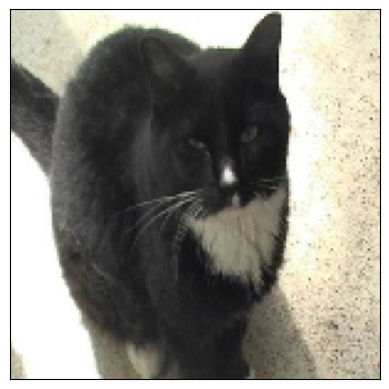

1/1 [==============================] - 0s 332ms/step
The image above is a CAT!


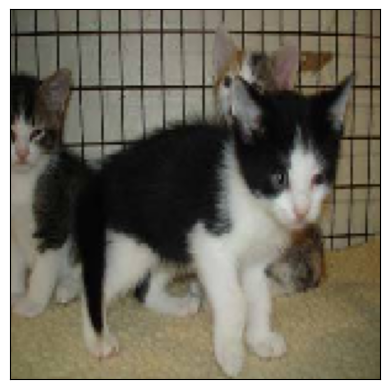

1/1 [==============================] - 0s 17ms/step
The image above is a CAT!


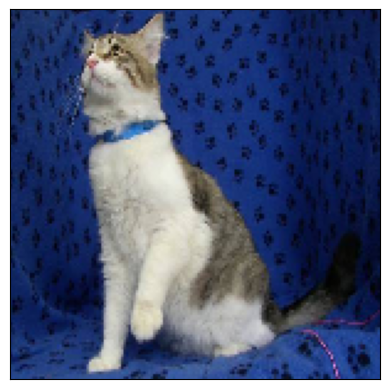

1/1 [==============================] - 0s 25ms/step
The image above is a CAT!


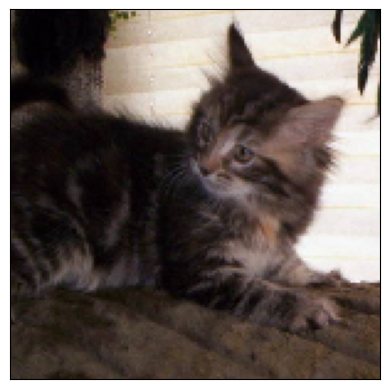

1/1 [==============================] - 0s 26ms/step
The image above is a DOG!


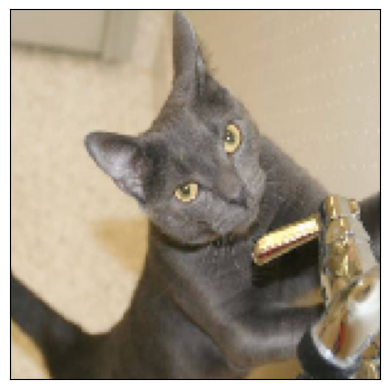

1/1 [==============================] - 0s 18ms/step
The image above is a CAT!


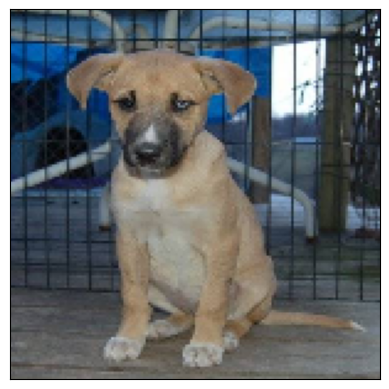

1/1 [==============================] - 0s 22ms/step
The image above is a DOG!


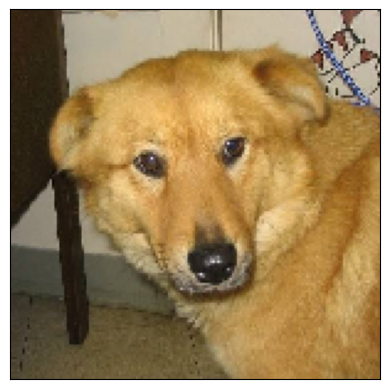

1/1 [==============================] - 0s 20ms/step
The image above is a DOG!


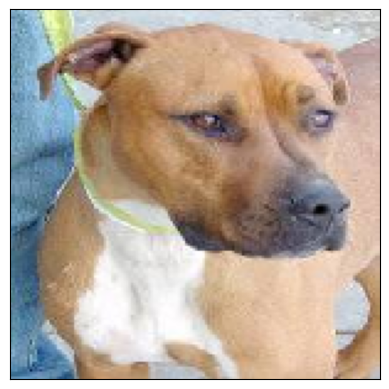

1/1 [==============================] - 0s 25ms/step
The image above is a DOG!


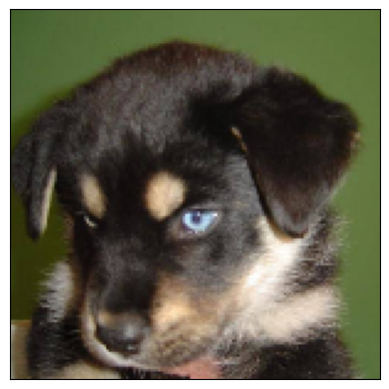

1/1 [==============================] - 0s 27ms/step
The image above is a DOG!


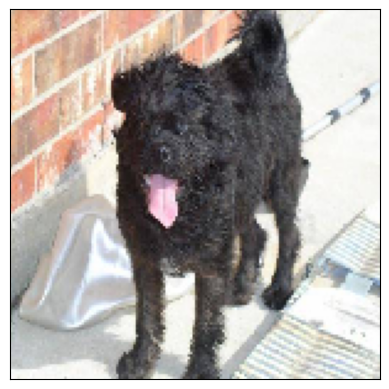

1/1 [==============================] - 0s 30ms/step
The image above is a DOG!


In [9]:
import numpy as np

WEIGHTS_FILE = 'first_model.h5'
PATH = '/raw_data/cats_and_dogs_filtered/'
model = create_model()
model.load_weights(WEIGHTS_FILE)

random_cat_number = random.randint(0,len(train_cat_filenames))
random_dog_number = random.randint(0,len(train_dog_filenames))

CAT_IMAGES = []
DOG_IMAGES = []
for _ in range(5):
  CAT_IMAGES.append(PATH + 'train/cats/cat.' + str(random.randint(0,len(train_cat_filenames))) + '.jpg')
  DOG_IMAGES.append(PATH + 'train/dogs/dog.' + str(random.randint(0,len(train_dog_filenames))) + '.jpg')


def test_model(array_of_images, model):
    # Loop through the array of images
    for i in range(0, len(array_of_images)):
        # Load the image and resize it to the network input layer (150, 150)
        img = load_img(array_of_images[i], target_size=(150,150))

        # Remove the plot x and y ticks
        plt.xticks([])
        plt.yticks([])

        # Show the image
        plt.imshow(img)
        plt.show()

        # Do transformations on the image so that it can be input as an argument to
        # the model prediction
        img = img_to_array(img)
        img = img.reshape((1,) + img.shape)
        img_classes = (model.predict(img) > 0.5).astype("int32")

        if img_classes[0] == 0:
            print("The image above is a CAT!")
        else:
            print("The image above is a DOG!")

test_model(CAT_IMAGES, model)
test_model(DOG_IMAGES, model)

# Evaluating our Model


Final Accuracy:  0.8631250262260437
Final Loss:  0.3186701834201813


Text(0.5, 1.0, 'Training and validation loss')

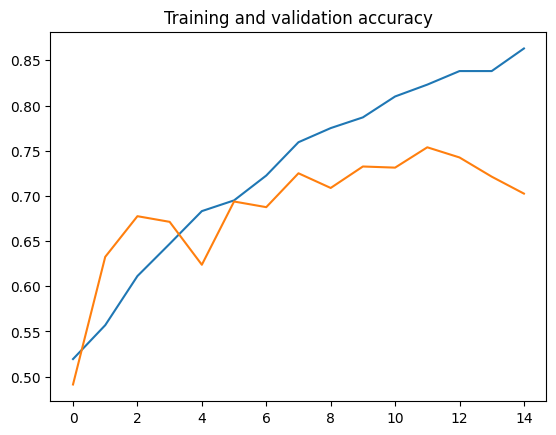

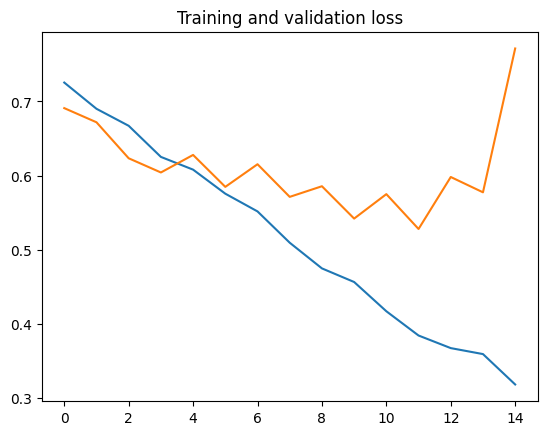

In [10]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']

print("Final Accuracy: ", accuracy[-1])

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']

print("Final Loss: ", loss[-1])

# Get number of epochs
epochs = range(len(accuracy))

# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy)
plt.plot(epochs, val_accuracy)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# Try with your own pet

Upload a picture of your own cat or dog
If you don't own a cat or a dog, use your favourite picture from google

To upload a photo, click the upload icon in the left hand side of this notebook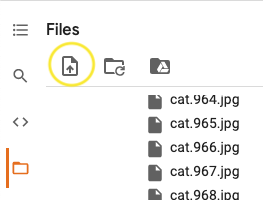

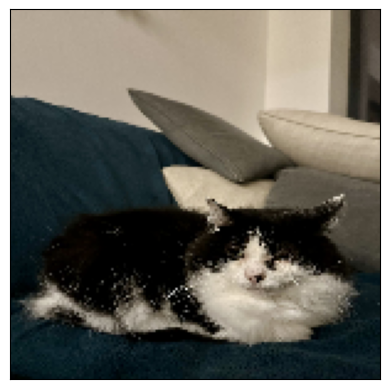

1/1 [==============================] - 0s 18ms/step
The image above is a DOG!


In [12]:
# Paste the path to your image into FILENAME
# To find the path, right click on your image in the files browser (left) and click "copy path"
FILENAME = "/spring.jpeg"

test_model([FILENAME], model)

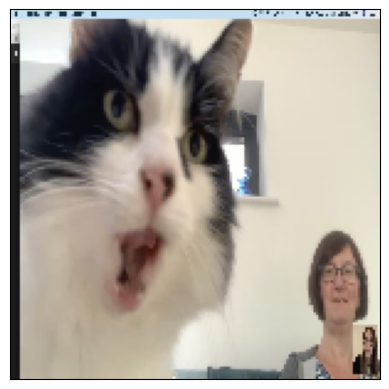

1/1 [==============================] - 0s 17ms/step
The image above is a CAT!


# Extension Activities - Experimenting with Convolutional Neural Networks

To deepen your understanding of CNNs and their components, have a go at altering your model.

### Changing the activation function.
Experiment with different activation functions to see how they affect the model's performance.
Try ReLU, Sigmoid or TanH.

### Modifying the number of layers.
Test how the depth of the network influences its ability to learn and generalise.
Add or remove convolutional layers to see how it affects the network's ability to extract features.
Experiment with fully connected laters at the end of the network to see how they affect the final prediction.

### Changing the filter size and number.
Try using smaller (3x3) or larger (7x7) filters and observe how it affects feature extraction.

### Experimenting with dropout rates.
Dropout is a regularisation technique to prevent overfitting by randomly turning off neurons during training.

### Augmenting the data.
Augmenting the training data can improve the models robustness and generalisation. Try applying transformations such as rotation, flipping, zooming, and shifting to artificially increase the size of your dataset.

### Training the model for more or less epochs.
See if more or less training is beneficial for the accuracy of the model.

### Using a different data set.
The internet is awash with data - try finding another dataset. You don't even have to stick to cats and dogs!

See how your changes affect the accuracy of your model's predictions.

